In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('AirPassengers.csv')
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [18]:
data.index = pd.to_datetime(data.index)
data.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


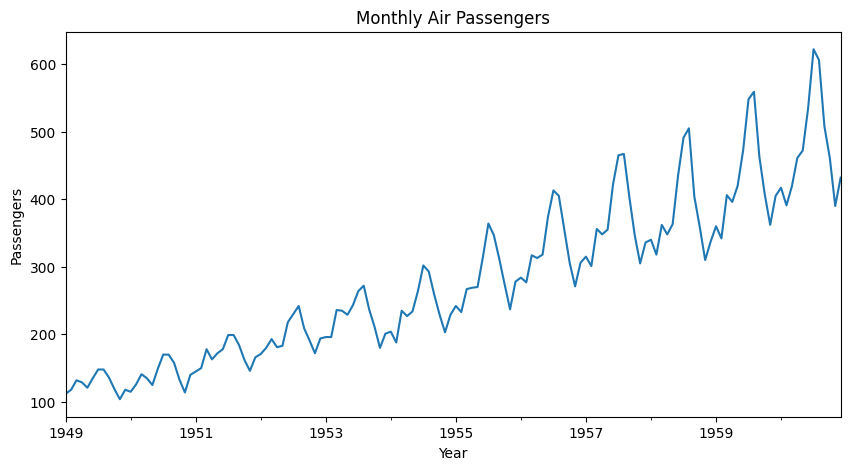

In [20]:
import matplotlib.pyplot as plt

data['Passengers'].plot(figsize=(10,5))
plt.title('Monthly Air Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()


/tmp/ipython-input-3385500903.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = data['Passengers'].resample('Y').mean()


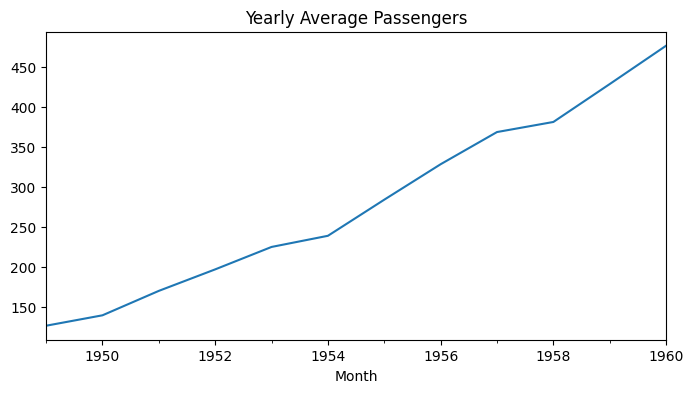

In [21]:
yearly_data = data['Passengers'].resample('Y').mean()

yearly_data.plot(figsize=(8,4))
plt.title('Yearly Average Passengers')
plt.show()


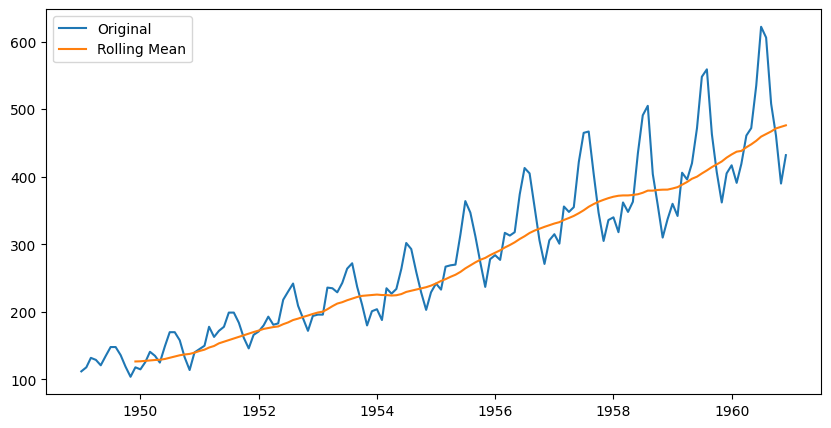

In [22]:
data['Rolling_Mean'] = data['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(10,5))
plt.plot(data['Passengers'], label='Original')
plt.plot(data['Rolling_Mean'], label='Rolling Mean')
plt.legend()
plt.show()


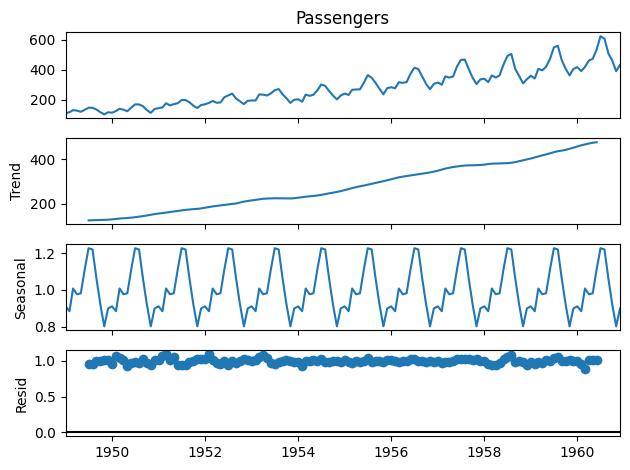

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')
decomposition.plot()
plt.show()


In [25]:
train = data.iloc[:-24]
test = data.iloc[-24:]

print(train.shape,test.shape)


(120, 2) (24, 2)


In [26]:
from statsmodels.tsa.arima.model import ARIMA


In [28]:
forecast = model_fit.forecast(steps=24)
forecast


,predicted_mean
1959-01-01,371.774505
1959-02-01,353.970544
1959-03-01,363.085872
1959-04-01,358.418977
1959-05-01,360.808349
1959-06-01,359.585031
1959-07-01,360.211349
1959-08-01,359.890685
1959-09-01,360.054859
1959-10-01,359.970805


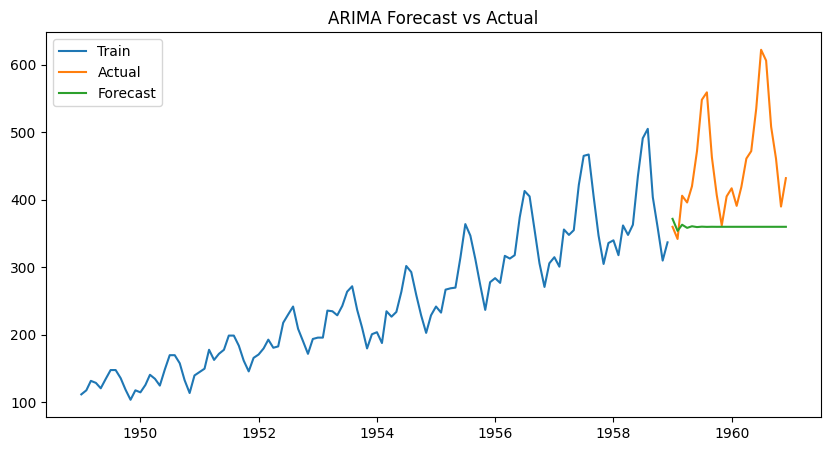

In [29]:
plt.figure(figsize=(10,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['Passengers'], forecast)
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 93.90498944266244
RMSE: 118.64452733043365
